In [ ]:
import numpy as np #2 lineer cebir işlemleri
import pandas as pd # data işleme süreci, CSV uzantılı dosya işlemle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew # bazı istatistiksel hesaplamalar
import cufflinks as cf
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor



In [ ]:
pip install researchpy

In [ ]:
import researchpy as rp

In [ ]:
from yellowbrick.features import Rank1D
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from yellowbrick.regressor import AlphaSelection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
import warnings
warnings.filterwarnings ('ignore')
warnings.simplefilter('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Konut_Satis_Fiyatlandirma/train.csv', encoding='latin-1')
test = pd.read_csv('/content/drive/MyDrive/Konut_Satis_Fiyatlandirma/test.csv', encoding='latin-1')

In [ ]:
train_ids=train ['Id']
test_ids=test['Id']

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [ ]:
train

,InsaatTipiKodu,ImarSiniflandirmasi,ArsaCephesi,ArsaAlani,SokakTipi,GecitTipi,ArsaSekli,AraziKonturu,Hizmetler,ArsaKonumu,...,HavuzAlani,HavuzKalitesi,Cit,DigerOzellik,DigerOzellikDegeri,SatisAyi,SatisYili,SatisTipi,SatisDurumu,SatisFiyat
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
test

,InsaatTipiKodu,ImarSiniflandirmasi,ArsaCephesi,ArsaAlani,SokakTipi,GecitTipi,ArsaSekli,AraziKonturu,Hizmetler,ArsaKonumu,...,EkranliTerasAlani,HavuzAlani,HavuzKalitesi,Cit,DigerOzellik,DigerOzellikDegeri,SatisAyi,SatisYili,SatisTipi,SatisDurumu
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
train.head()

,InsaatTipiKodu,ImarSiniflandirmasi,ArsaCephesi,ArsaAlani,SokakTipi,GecitTipi,ArsaSekli,AraziKonturu,Hizmetler,ArsaKonumu,...,HavuzAlani,HavuzKalitesi,Cit,DigerOzellik,DigerOzellikDegeri,SatisAyi,SatisYili,SatisTipi,SatisDurumu,SatisFiyat
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print('Eğitim Veri Seti Satır Sayısı', train.shape[0])
print('Eğitim Veri Seti Sütun Sayısı:',train.shape[1])

Eğitim Veri Seti Satır Sayısı 1460
Eğitim Veri Seti Sütun Sayısı: 80


In [ ]:
train.shape

(1460, 80)

In [ ]:
test.shape

(1459, 79)

In [ ]:
train.size

116800

In [ ]:
test.size

115261

In [ ]:
print('Eğitim Veri Seti Sütunları:\n')
print (train.dtypes)

Eğitim Veri Seti Sütunları:

InsaatTipiKodu           int64
ImarSiniflandirmasi     object
ArsaCephesi            float64
ArsaAlani                int64
SokakTipi               object
                        ...   
SatisAyi                 int64
SatisYili                int64
SatisTipi               object
SatisDurumu             object
SatisFiyat               int64
Length: 80, dtype: object


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   InsaatTipiKodu             1460 non-null   int64  
 1   ImarSiniflandirmasi        1460 non-null   object 
 2   ArsaCephesi                1201 non-null   float64
 3   ArsaAlani                  1460 non-null   int64  
 4   SokakTipi                  1460 non-null   object 
 5   GecitTipi                  91 non-null     object 
 6   ArsaSekli                  1460 non-null   object 
 7   AraziKonturu               1460 non-null   object 
 8   Hizmetler                  1460 non-null   object 
 9   ArsaKonumu                 1460 non-null   object 
 10  AraziEgimi                 1460 non-null   object 
 11  Mahalle                    1460 non-null   object 
 12  Durum1                     1460 non-null   object 
 13  Durum2                     1460 non-null   objec

In [ ]:
test.head()

,InsaatTipiKodu,ImarSiniflandirmasi,ArsaCephesi,ArsaAlani,SokakTipi,GecitTipi,ArsaSekli,AraziKonturu,Hizmetler,ArsaKonumu,...,EkranliTerasAlani,HavuzAlani,HavuzKalitesi,Cit,DigerOzellik,DigerOzellikDegeri,SatisAyi,SatisYili,SatisTipi,SatisDurumu
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print('Test Veri Seti Satır Sayısı:', test.shape[0])
print('Test Veri Seti Sütun Sayısı:',test.shape[1])

Test Veri Seti Satır Sayısı: 1459
Test Veri Seti Sütun Sayısı: 79


In [ ]:
train['SatisFiyat'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SatisFiyat, dtype: float64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
InsaatTipiKodu,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
ArsaCephesi,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
ArsaAlani,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
GenelKalite,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
GenelDurum,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
InsaaYili,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YenilemeYili,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
DuvarKaplamaAlani,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BodrumBitirmeAlani1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BodrumBitirmeAlani2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


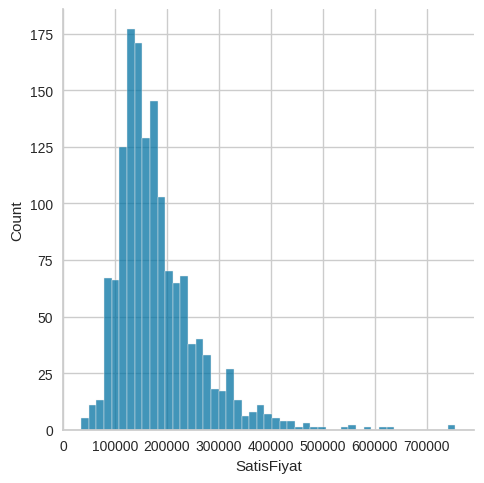

In [ ]:
sns.displot (data=train, x="SatisFiyat");

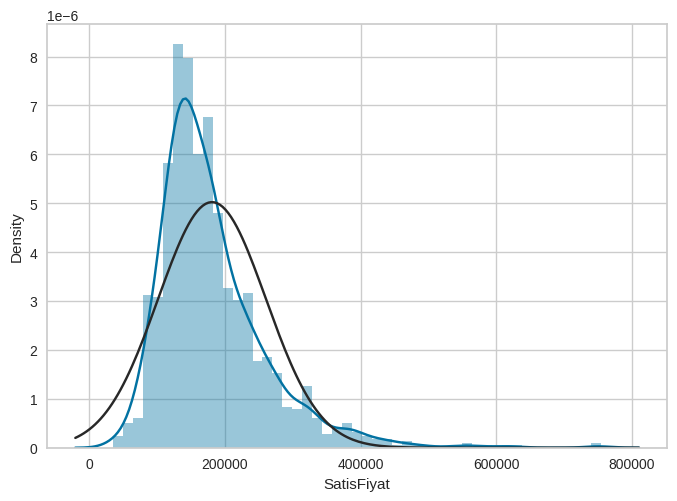

In [ ]:
sns.distplot (train.SatisFiyat, fit=norm);

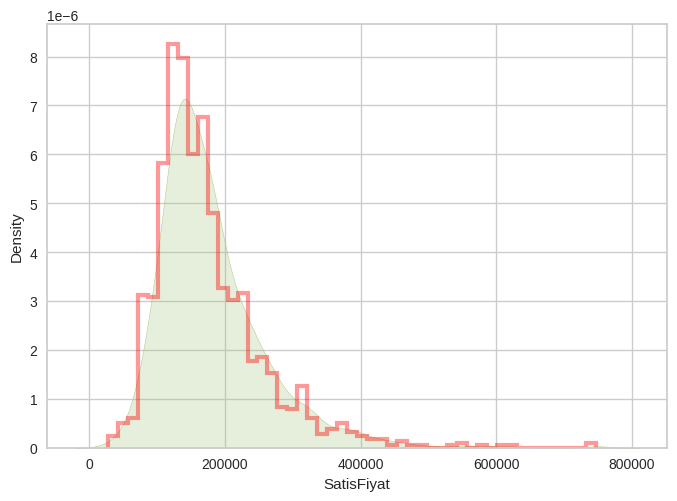

In [ ]:
sns.distplot(a=train ['SatisFiyat'], hist_kws={'histtype': 'step', 'align': 'left', 'color':'red', 'lw':3},
             kde_kws={'color':'g', 'shade': True})
plt.show()


 Aritmetik Ortalama = 180921.20 and Standart Sapma = 79415.29



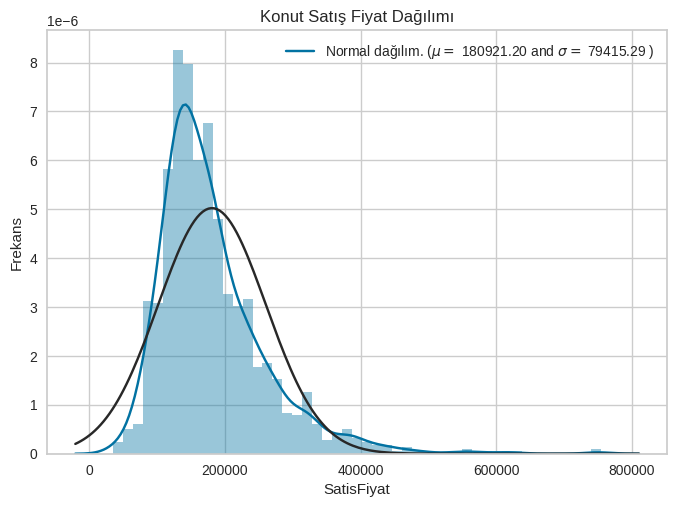

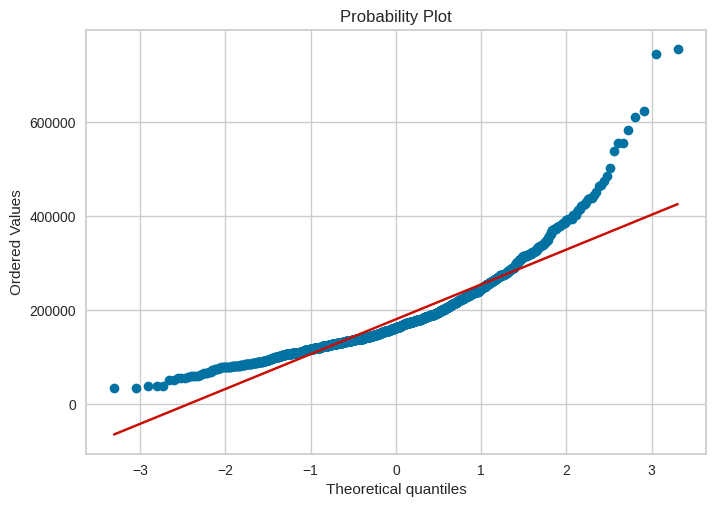

In [ ]:
sns.distplot(train['SatisFiyat'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SatisFiyat'])
print( '\n Aritmetik Ortalama = {:.2f} and Standart Sapma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dağılım. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frekans')
plt.title('Konut Satış Fiyat Dağılımı')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SatisFiyat'], plot=plt)
plt.show()

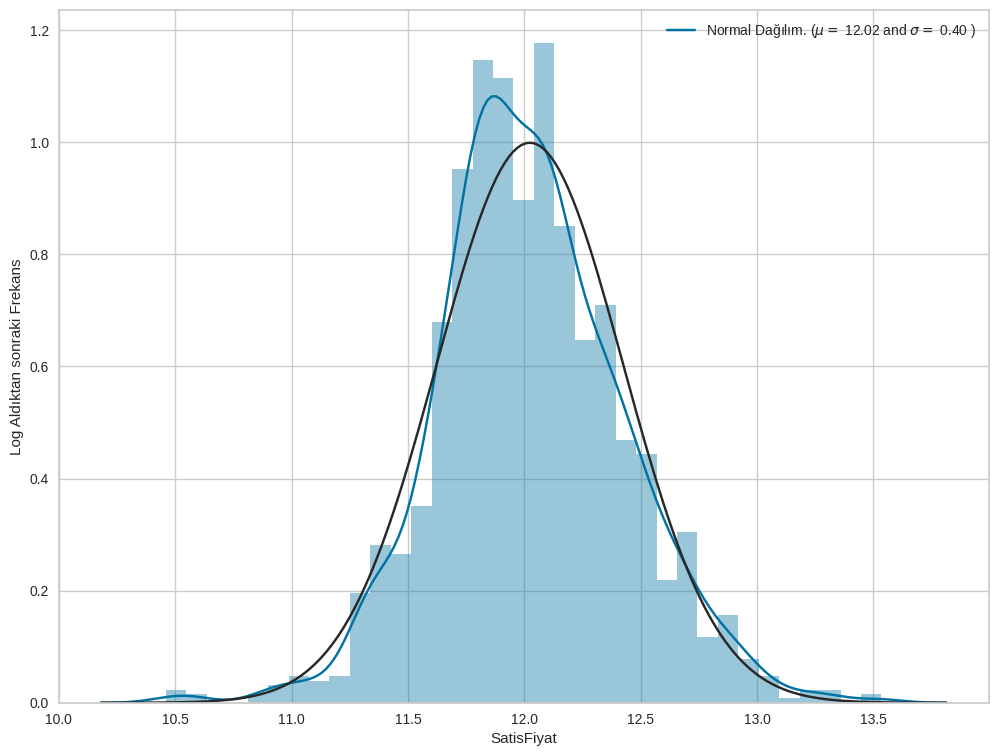

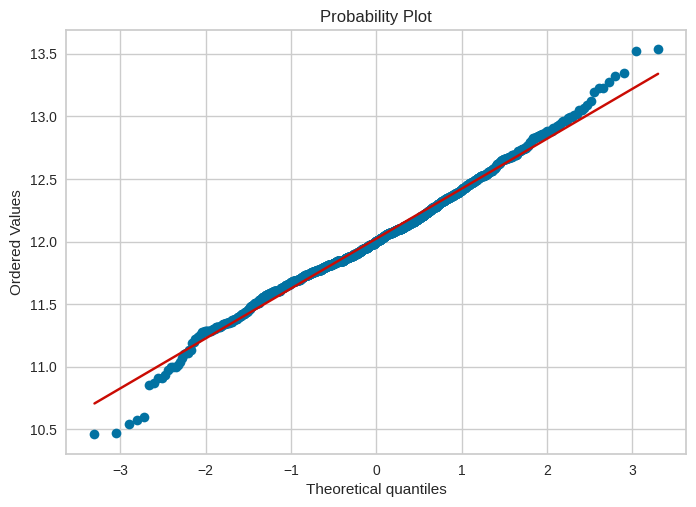

In [ ]:
train['SatisFiyat'] = np.log1p(train['SatisFiyat'])

# normal dağılımı kontrol edilmesi tablolandırılması

plt.subplots(figsize =(12, 9))
sns.distplot(train['SatisFiyat'], fit = stats.norm)


(mu, sigma) = stats.norm.fit(train['SatisFiyat'])

#Dağılımın görselleştirilmesi
plt.legend(['Normal Dağılım. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )' .format(mu, sigma)], loc = 'best')
plt.ylabel('Log Aldıktan sonraki Frekans')

#Olasılık durumunun görselleştirilmesi
fig = plt.figure()
stats.probplot(train['SatisFiyat'], plot = plt)
plt.show()

<Axes: xlabel='SatisFiyat', ylabel='Count'>

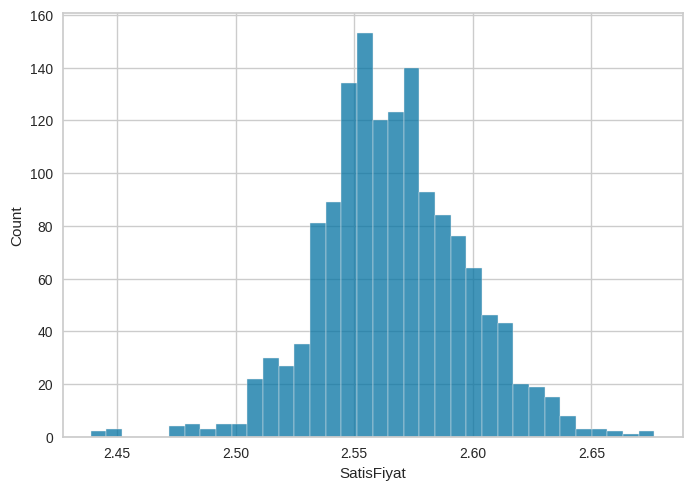

In [ ]:
sns.histplot(np.log1p(train['SatisFiyat']))

In [ ]:
train_numeric=train.select_dtypes(include=["float64","int64"])
train_numeric.head()

,InsaatTipiKodu,ArsaCephesi,ArsaAlani,GenelKalite,GenelDurum,InsaaYili,YenilemeYili,DuvarKaplamaAlani,BodrumBitirmeAlani1,BodrumBitirmeAlani2,...,AhsapTerasAlani,AcikTerasAlani,KapaliTerasAlani,UcMevsimTerasAlani,EkranliTerasAlani,HavuzAlani,DigerOzellikDegeri,SatisAyi,SatisYili,SatisFiyat
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220


In [ ]:
train_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
InsaatTipiKodu,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
ArsaCephesi,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
ArsaAlani,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
GenelKalite,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
GenelDurum,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
InsaaYili,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YenilemeYili,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
DuvarKaplamaAlani,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BodrumBitirmeAlani1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BodrumBitirmeAlani2,1460.0,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000


In [ ]:
rp.summary_cont(train["SatisFiyat"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SatisFiyat,1460.0,12.0241,0.3994,0.0105,12.0036,12.0446


In [ ]:
rp.summary_cont(train[["SatisYili","DigerOzellikDegeri"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SatisYili,1460.0,2007.8158,1.3281,0.0348,2007.7476,2007.8839
1,DigerOzellikDegeri,1460.0,43.4890,496.1230,12.9841,18.0195,68.9586


In [ ]:
numeric_columns = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm').format("{:.4f}")




,InsaatTipiKodu,ArsaCephesi,ArsaAlani,GenelKalite,GenelDurum,InsaaYili,YenilemeYili,DuvarKaplamaAlani,BodrumBitirmeAlani1,BodrumBitirmeAlani2,BodrumBitirmeAlani2.1,ToplamBodrumAlani,ZeminKatAlani,ÝkinciKatAlani,DusukKaliteliBitirmeAlani,ToplamYasamAlani,BodrumTamBanyoSayisi,BodrumYarimBanyoSayisi,TamBanyoSayisi,YarimBanyoSayisi,YatakOdaSayisi,MutfakSayisi,ToplamOdaSayisi,SomineSayisi,GarajInsaaYili,GarajAracKapasitesi,GarajAlani,AhsapTerasAlani,AcikTerasAlani,KapaliTerasAlani,UcMevsimTerasAlani,EkranliTerasAlani,HavuzAlani,DigerOzellikDegeri,SatisAyi,SatisYili,SatisFiyat
InsaatTipiKodu,1.0000,-0.3863,-0.1398,0.0326,-0.0593,0.0279,0.0406,0.0229,-0.0698,-0.0656,-0.1408,-0.2385,-0.2518,0.3079,0.0465,0.0749,0.0035,-0.0023,0.1316,0.1774,-0.0234,0.2817,0.0404,-0.0456,0.0851,-0.0401,-0.0987,-0.0126,-0.0061,-0.0120,-0.0438,-0.0260,0.0083,-0.0077,-0.0136,-0.0214,-0.0740
ArsaCephesi,-0.3863,1.0000,0.4261,0.2516,-0.0592,0.1233,0.0889,0.1935,0.2336,0.0499,0.1326,0.3921,0.4572,0.0802,0.0385,0.4028,0.1009,-0.0072,0.1988,0.0535,0.2632,-0.0061,0.3521,0.2666,0.0702,0.2857,0.3450,0.0885,0.1520,0.0107,0.0700,0.0414,0.2062,0.0034,0.0112,0.0074,0.3559
ArsaAlani,-0.1398,0.4261,1.0000,0.1058,-0.0056,0.0142,0.0138,0.1042,0.2141,0.1112,-0.0026,0.2608,0.2995,0.0510,0.0048,0.2631,0.1582,0.0480,0.1260,0.0143,0.1197,-0.0178,0.1900,0.2714,-0.0249,0.1549,0.1804,0.1717,0.0848,-0.0183,0.0204,0.0432,0.0777,0.0381,0.0012,-0.0143,0.2573
GenelKalite,0.0326,0.2516,0.1058,1.0000,-0.0919,0.5723,0.5507,0.4119,0.2397,-0.0591,0.3082,0.5378,0.4762,0.2955,-0.0304,0.5930,0.1111,-0.0402,0.5506,0.2735,0.1017,-0.1839,0.4275,0.3968,0.5478,0.6007,0.5620,0.2389,0.3088,-0.1139,0.0304,0.0649,0.0652,-0.0314,0.0708,-0.0273,0.8172
GenelDurum,-0.0593,-0.0592,-0.0056,-0.0919,1.0000,-0.3760,0.0737,-0.1281,-0.0462,0.0402,-0.1368,-0.1711,-0.1442,0.0289,0.0255,-0.0797,-0.0549,0.1178,-0.1941,-0.0608,0.0130,-0.0870,-0.0576,-0.0238,-0.3243,-0.1858,-0.1515,-0.0033,-0.0326,0.0704,0.0255,0.0548,-0.0020,0.0688,-0.0035,0.0439,-0.0369
InsaaYili,0.0279,0.1233,0.0142,0.5723,-0.3760,1.0000,0.5929,0.3157,0.2495,-0.0491,0.1490,0.3915,0.2820,0.0103,-0.1838,0.1990,0.1876,-0.0382,0.4683,0.2427,-0.0707,-0.1748,0.0956,0.1477,0.8257,0.5379,0.4790,0.2249,0.1887,-0.3873,0.0314,-0.0504,0.0049,-0.0344,0.0124,-0.0136,0.5866
YenilemeYili,0.0406,0.0889,0.0138,0.5507,0.0737,0.5929,1.0000,0.1796,0.1285,-0.0678,0.1811,0.2911,0.2404,0.1400,-0.0624,0.2874,0.1195,-0.0123,0.4390,0.1833,-0.0406,-0.1496,0.1917,0.1126,0.6423,0.4206,0.3716,0.2057,0.2263,-0.1939,0.0453,-0.0387,0.0058,-0.0103,0.0215,0.0357,0.5656
DuvarKaplamaAlani,0.0229,0.1935,0.1042,0.4119,-0.1281,0.3157,0.1796,1.0000,0.2647,-0.0723,0.1144,0.3639,0.3445,0.1746,-0.0691,0.3909,0.0853,0.0267,0.2768,0.2014,0.1028,-0.0376,0.2807,0.2491,0.2527,0.3642,0.3731,0.1597,0.1257,-0.1102,0.0188,0.0615,0.0117,-0.0298,-0.0060,-0.0082,0.4308
BodrumBitirmeAlani1,-0.0698,0.2336,0.2141,0.2397,-0.0462,0.2495,0.1285,0.2647,1.0000,-0.0501,-0.4953,0.5224,0.4459,-0.1371,-0.0645,0.2082,0.6492,0.0674,0.0585,0.0043,-0.1074,-0.0810,0.0443,0.2600,0.1535,0.2241,0.2970,0.2043,0.1118,-0.1023,0.0265,0.0620,0.1405,0.0036,-0.0157,0.0144,0.3720
BodrumBitirmeAlani2,-0.0656,0.0499,0.1112,-0.0591,0.0402,-0.0491,-0.0678,-0.0723,-0.0501,1.0000,-0.2093,0.1048,0.0971,-0.0993,0.0148,-0.0096,0.1587,0.0709,-0.0764,-0.0321,-0.0157,-0.0408,-0.0352,0.0469,-0.0880,-0.0383,-0.0182,0.0679,0.0031,0.0365,-0.0300,0.0889,0.0417,0.0049,-0.0152,0.0317,0.0048


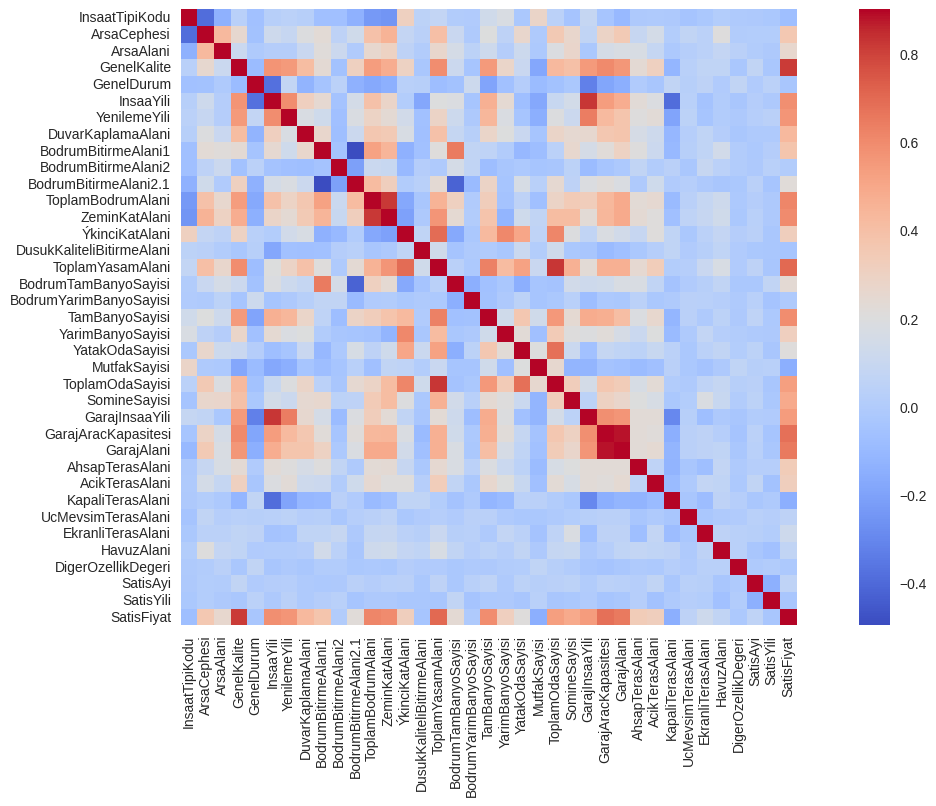

In [ ]:
# Sayısal sütunları seç
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
corr_statistics = numeric_columns.corr()

# Korelasyon matrisini görselleştir
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_statistics, cmap='coolwarm', vmax=0.9, square=True);
plt.show()


In [ ]:
#Verilerimizin içerisinden sadece sayısal verisetini ayıralım yukarıdaka görmüştük, 81 tane sütundan 38 tanesi sayısal veri içeriyordu
train_corr = train.select_dtypes(include = [np.number])

In [ ]:
train_corr.shape

(1460, 37)

In [ ]:
# Sayısal sütunları seç
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
corr = numeric_columns.corr()

# 'SalePrice' ile korelasyon katsayılarını sırala
sorted_corr_saleprice = corr['SatisFiyat'].sort_values(ascending=False)

print(sorted_corr_saleprice)


SatisFiyat                   1.000000
GenelKalite                  0.817185
ToplamYasamAlani             0.700927
GarajAracKapasitesi          0.680625
GarajAlani                   0.650888
ToplamBodrumAlani            0.612134
ZeminKatAlani                0.596981
TamBanyoSayisi               0.594771
InsaaYili                    0.586570
YenilemeYili                 0.565608
GarajInsaaYili               0.541073
ToplamOdaSayisi              0.534422
SomineSayisi                 0.489450
DuvarKaplamaAlani            0.430809
BodrumBitirmeAlani1          0.372023
ArsaCephesi                  0.355879
AhsapTerasAlani              0.334135
AcikTerasAlani               0.321053
ÝkinciKatAlani               0.319300
YarimBanyoSayisi             0.313982
ArsaAlani                    0.257320
BodrumTamBanyoSayisi         0.236224
BodrumBitirmeAlani2.1        0.221985
YatakOdaSayisi               0.209043
EkranliTerasAlani            0.121208
HavuzAlani                   0.069798
SatisAyi    

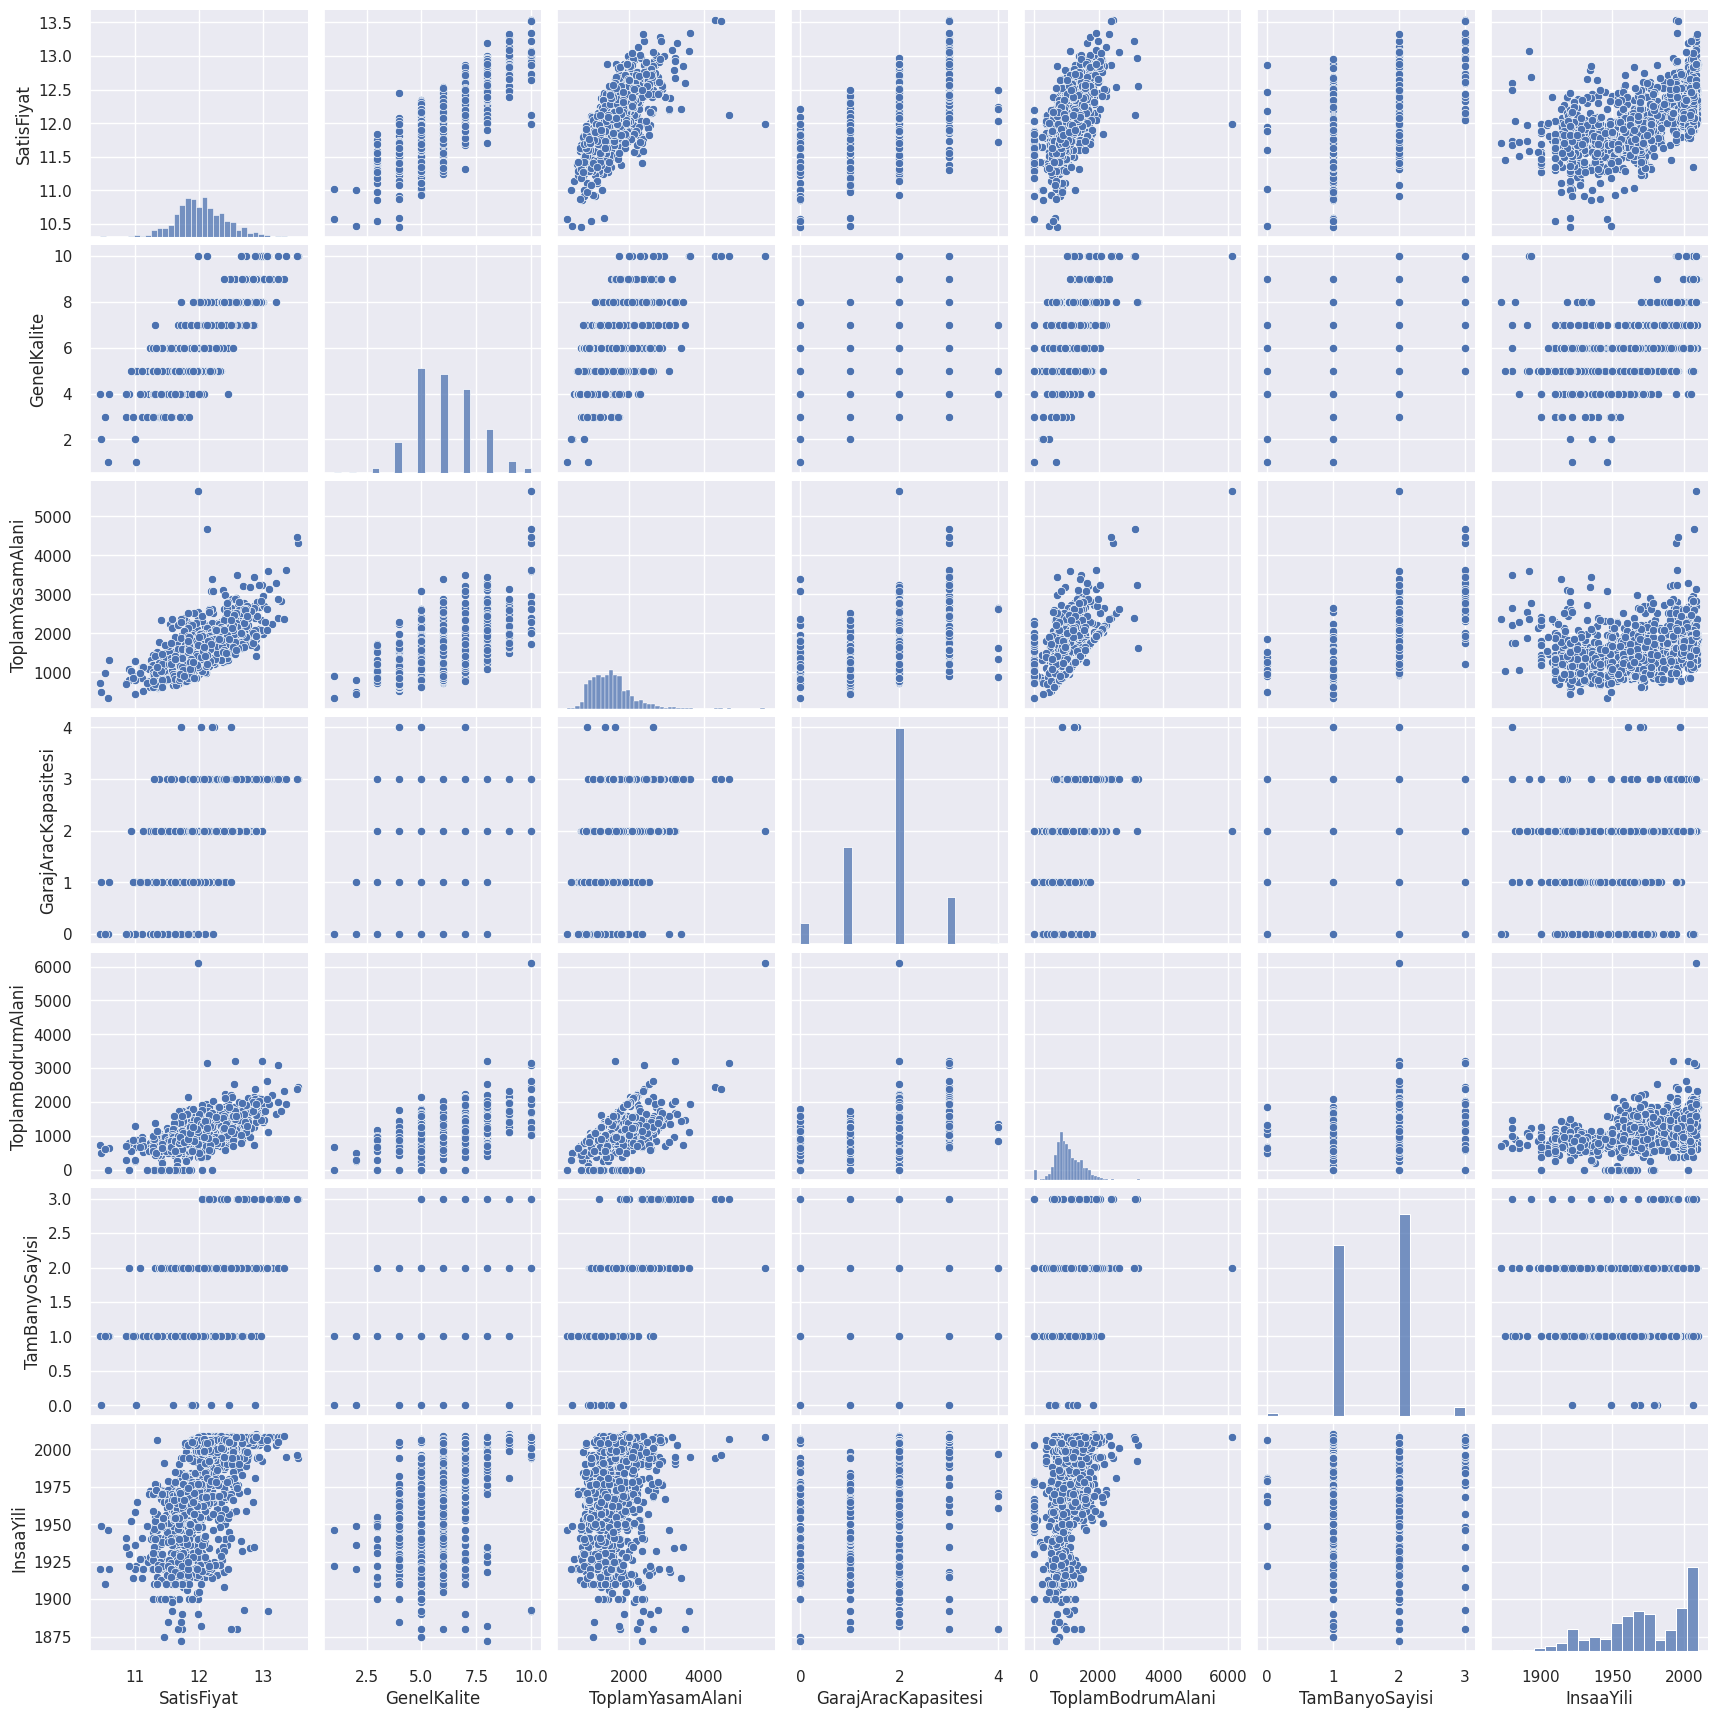

In [ ]:
#histogram and scatter plot
sns.set()
cols = ['SatisFiyat', 'GenelKalite', 'ToplamYasamAlani', 'GarajAracKapasitesi', 'ToplamBodrumAlani', 'TamBanyoSayisi', 'InsaaYili']
sns.pairplot(train[cols], height = 2.5)
plt.show();

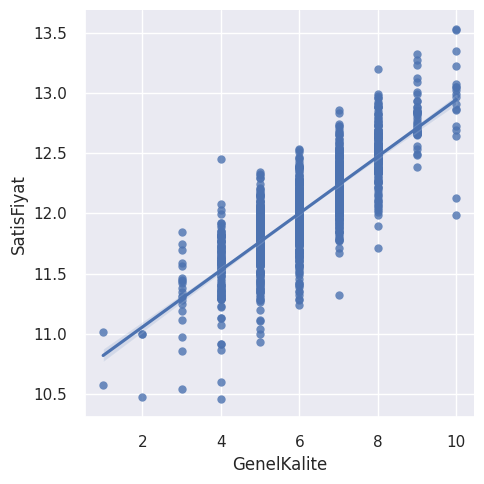

In [ ]:
# GenelKalite değikeni SatisFiyat ile ileri seviyede ilişkili(korelasyonu yüksek seviyede) olduğu tespit edilmiştir.
sns.lmplot(x='GenelKalite',y='SatisFiyat',data=train)

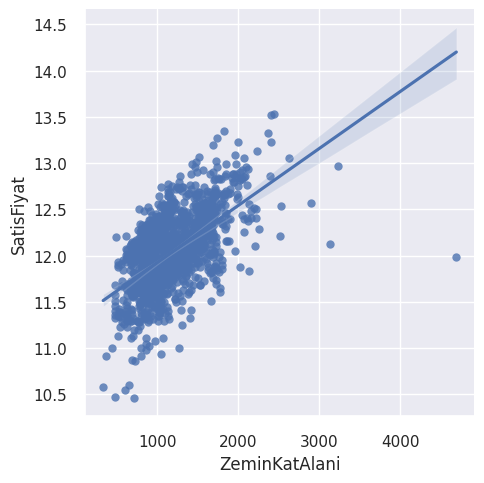

In [ ]:
# ZeminKatAlani değikeni SatisFiyat ile ileri seviyede ilişkili(korelasyonu yüksek seviyede) olduğu tespit edilmiştir.
sns.lmplot(x='ZeminKatAlani',y='SatisFiyat',data=train)

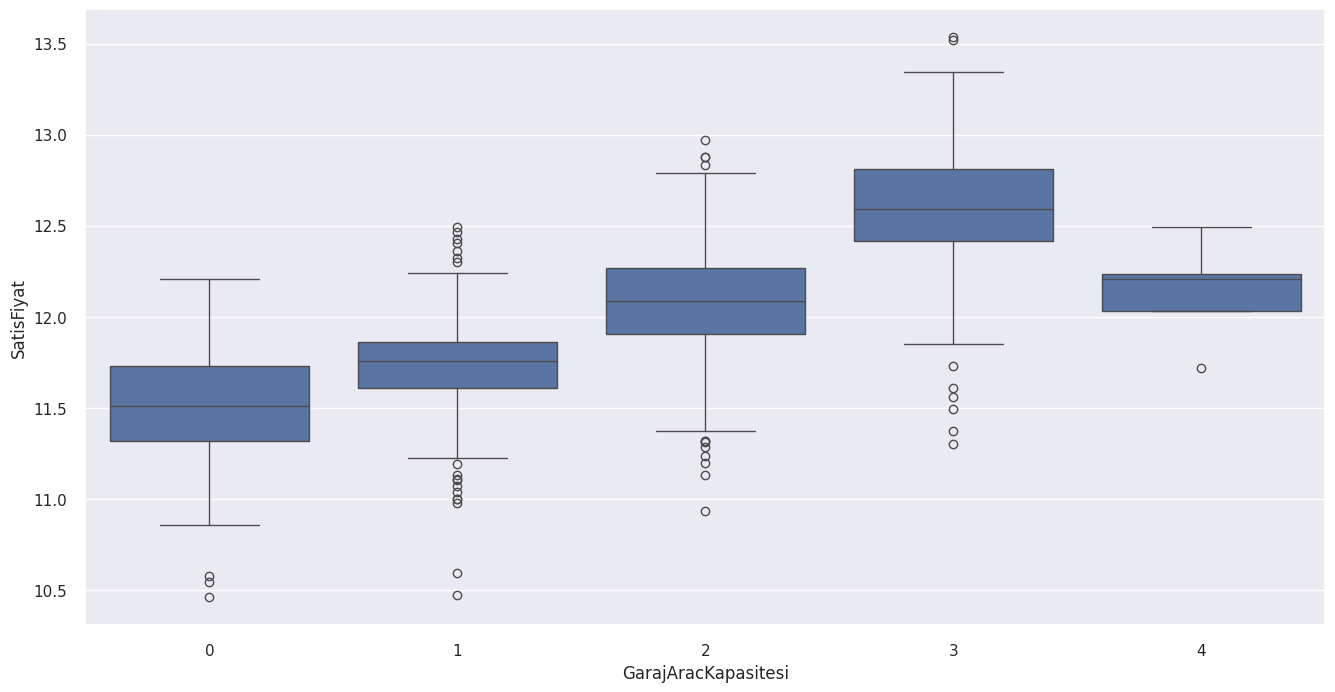

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarajAracKapasitesi',y='SatisFiyat',data=train)
plt.show()

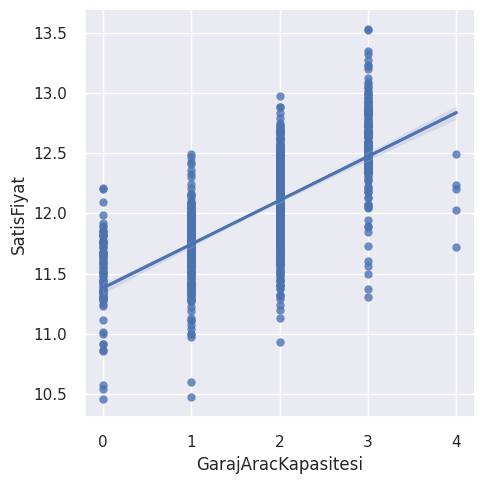

In [ ]:
sns.lmplot(x='GarajAracKapasitesi',y='SatisFiyat',data=train)


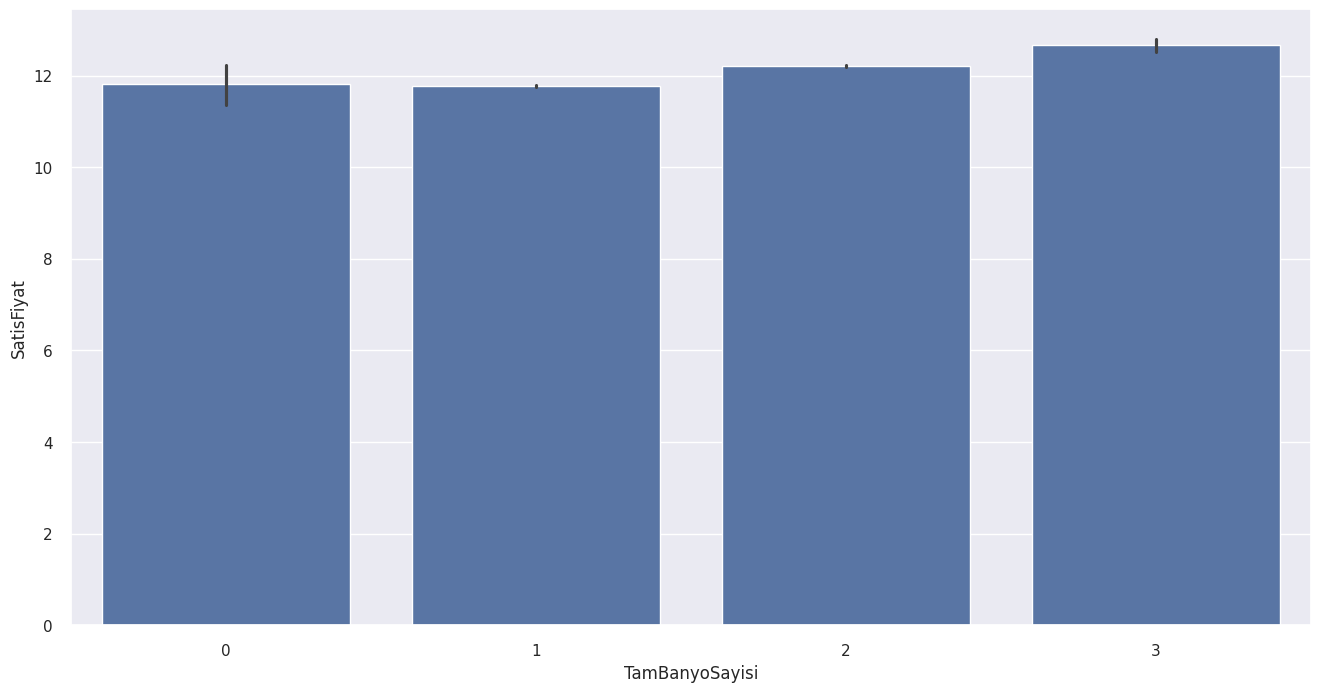

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='TamBanyoSayisi',y = 'SatisFiyat',data=train)
plt.show()

Eğitim Veri Setinde Missing Value (Eksik Gözlem) Tespiti


In [ ]:
train.isnull().values.any()


True

In [ ]:
train.columns[train.isnull().any()]


Index(['ArsaCephesi', 'GecitTipi', 'DuvarKaplamaTipi', 'DuvarKaplamaAlani',
       'BodrumKalitesi', 'BodrumDurumu', 'BodrumMaruziyeti',
       'BodrumBitirmeTipi1', 'BodrumBitirmeTipi2', 'ElektrikSistemi',
       'SomineKalitesi', 'GarajTipi', 'GarajInsaaYili', 'GarajBitirisDurumu',
       'GarajKalitesi', 'GarajDurumu', 'HavuzKalitesi', 'Cit', 'DigerOzellik'],
      dtype='object')

Eksik Verilerin Grafiği

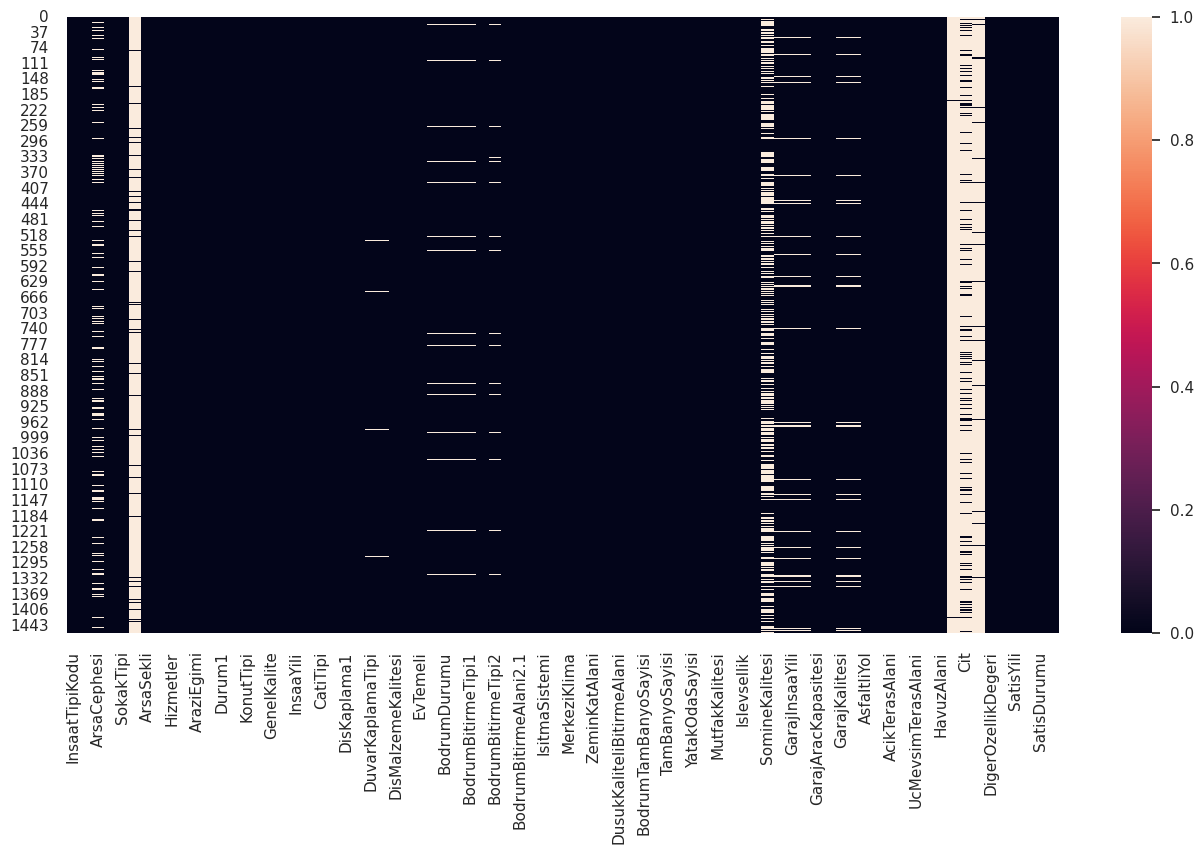

In [ ]:
plt.figure(figsize =(16,8)) # çizim grafiğine ait çerçeve belrleme kodu
sns.heatmap(train.isnull()) # seaborn kütüphanesinden bulunan heatmap görsel grafiği
plt.show()

Eğitim Veri Setinde Eksik Verinin Hangi Değişkenlerde Olduğunun Belirlenmesi (n), (%)


In [ ]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Toplam', 'Yüzde'])
missing_data.head(25)

,Toplam,Yüzde
HavuzKalitesi,1453,0.995205
DigerOzellik,1406,0.963014
GecitTipi,1369,0.937671
Cit,1179,0.807534
SomineKalitesi,690,0.472603
ArsaCephesi,259,0.177397
GarajInsaaYili,81,0.055479
GarajDurumu,81,0.055479
GarajTipi,81,0.055479
GarajBitirisDurumu,81,0.055479


Fonksiyon değeri olan show_missing_values() ile Verinin Kayıp Değer Analizi


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pip install matplotlib seaborn


In [ ]:
#Veri setindeki özelliklerin eksik değerlerini sayısal ve
#görsel olarak verir.
def show_missing_values(function_data):
#Veri setindeki eksik değerleri bulalım
    number_of_sample=function_data.shape[0]
    check_isnull=function_data.isnull().sum()

    check_isnull=check_isnull[check_isnull!=0].sort_values(ascending=False)

    if check_isnull.shape[0]==0:
        print("Veri setinde eksik bilgi yoktur")
        print(check_isnull)
    else:
        print(check_isnull)
        f, ax = plt.subplots(figsize=(15, 6))
        plt.xticks(rotation='90')
        sns.barplot(x=check_isnull.index, y=check_isnull)
        plt.title("Eksik veri içeren özellilere ait eksik veri sayısı")

HavuzKalitesi         1453
DigerOzellik          1406
GecitTipi             1369
Cit                   1179
SomineKalitesi         690
ArsaCephesi            259
GarajTipi               81
GarajInsaaYili          81
GarajBitirisDurumu      81
GarajKalitesi           81
GarajDurumu             81
BodrumMaruziyeti        38
BodrumBitirmeTipi2      38
BodrumBitirmeTipi1      37
BodrumDurumu            37
BodrumKalitesi          37
DuvarKaplamaAlani        8
DuvarKaplamaTipi         8
ElektrikSistemi          1
dtype: int64


ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

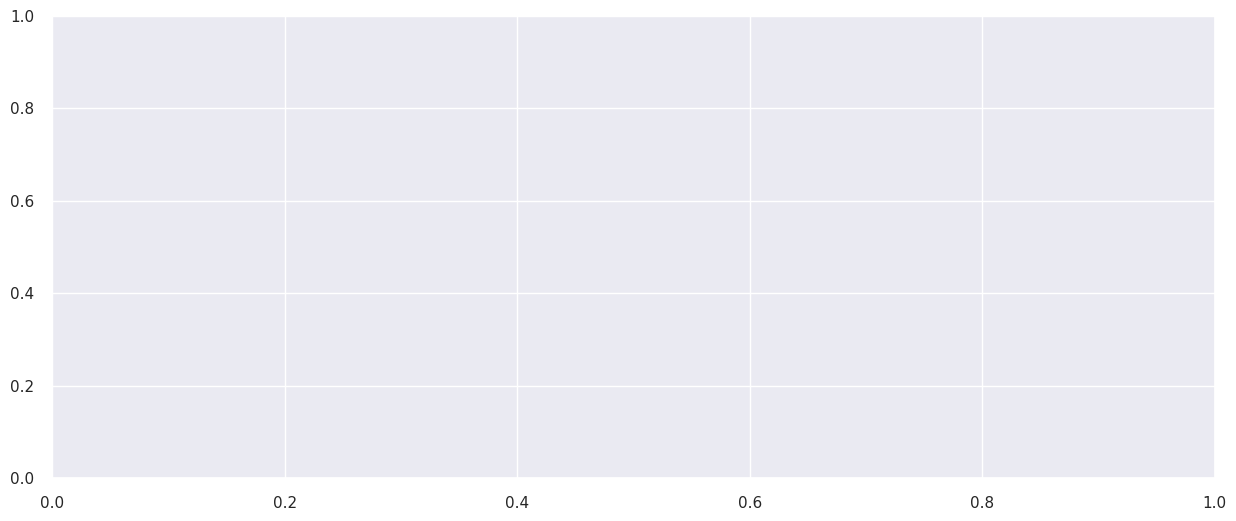

In [ ]:
#train veri seti için eksik bilgiler gösterilsin
show_missing_values(train)

Aykırı Değerlerin Çıkartılması

In [ ]:
print("Aykırı değerler çıkarılmadan önce train.shape:",train.shape)


Aykırı değerler çıkarılmadan önce train.shape: (1460, 80)


In [ ]:
train = train.drop(train[(train['ToplamYasamAlani']>3200) & (train['SatisFiyat']<300000)].index)


In [ ]:
print("Aykırı değerler çıkarıldıktan sonra train.shape:",train.shape)


Aykırı değerler çıkarıldıktan sonra train.shape: (1447, 80)


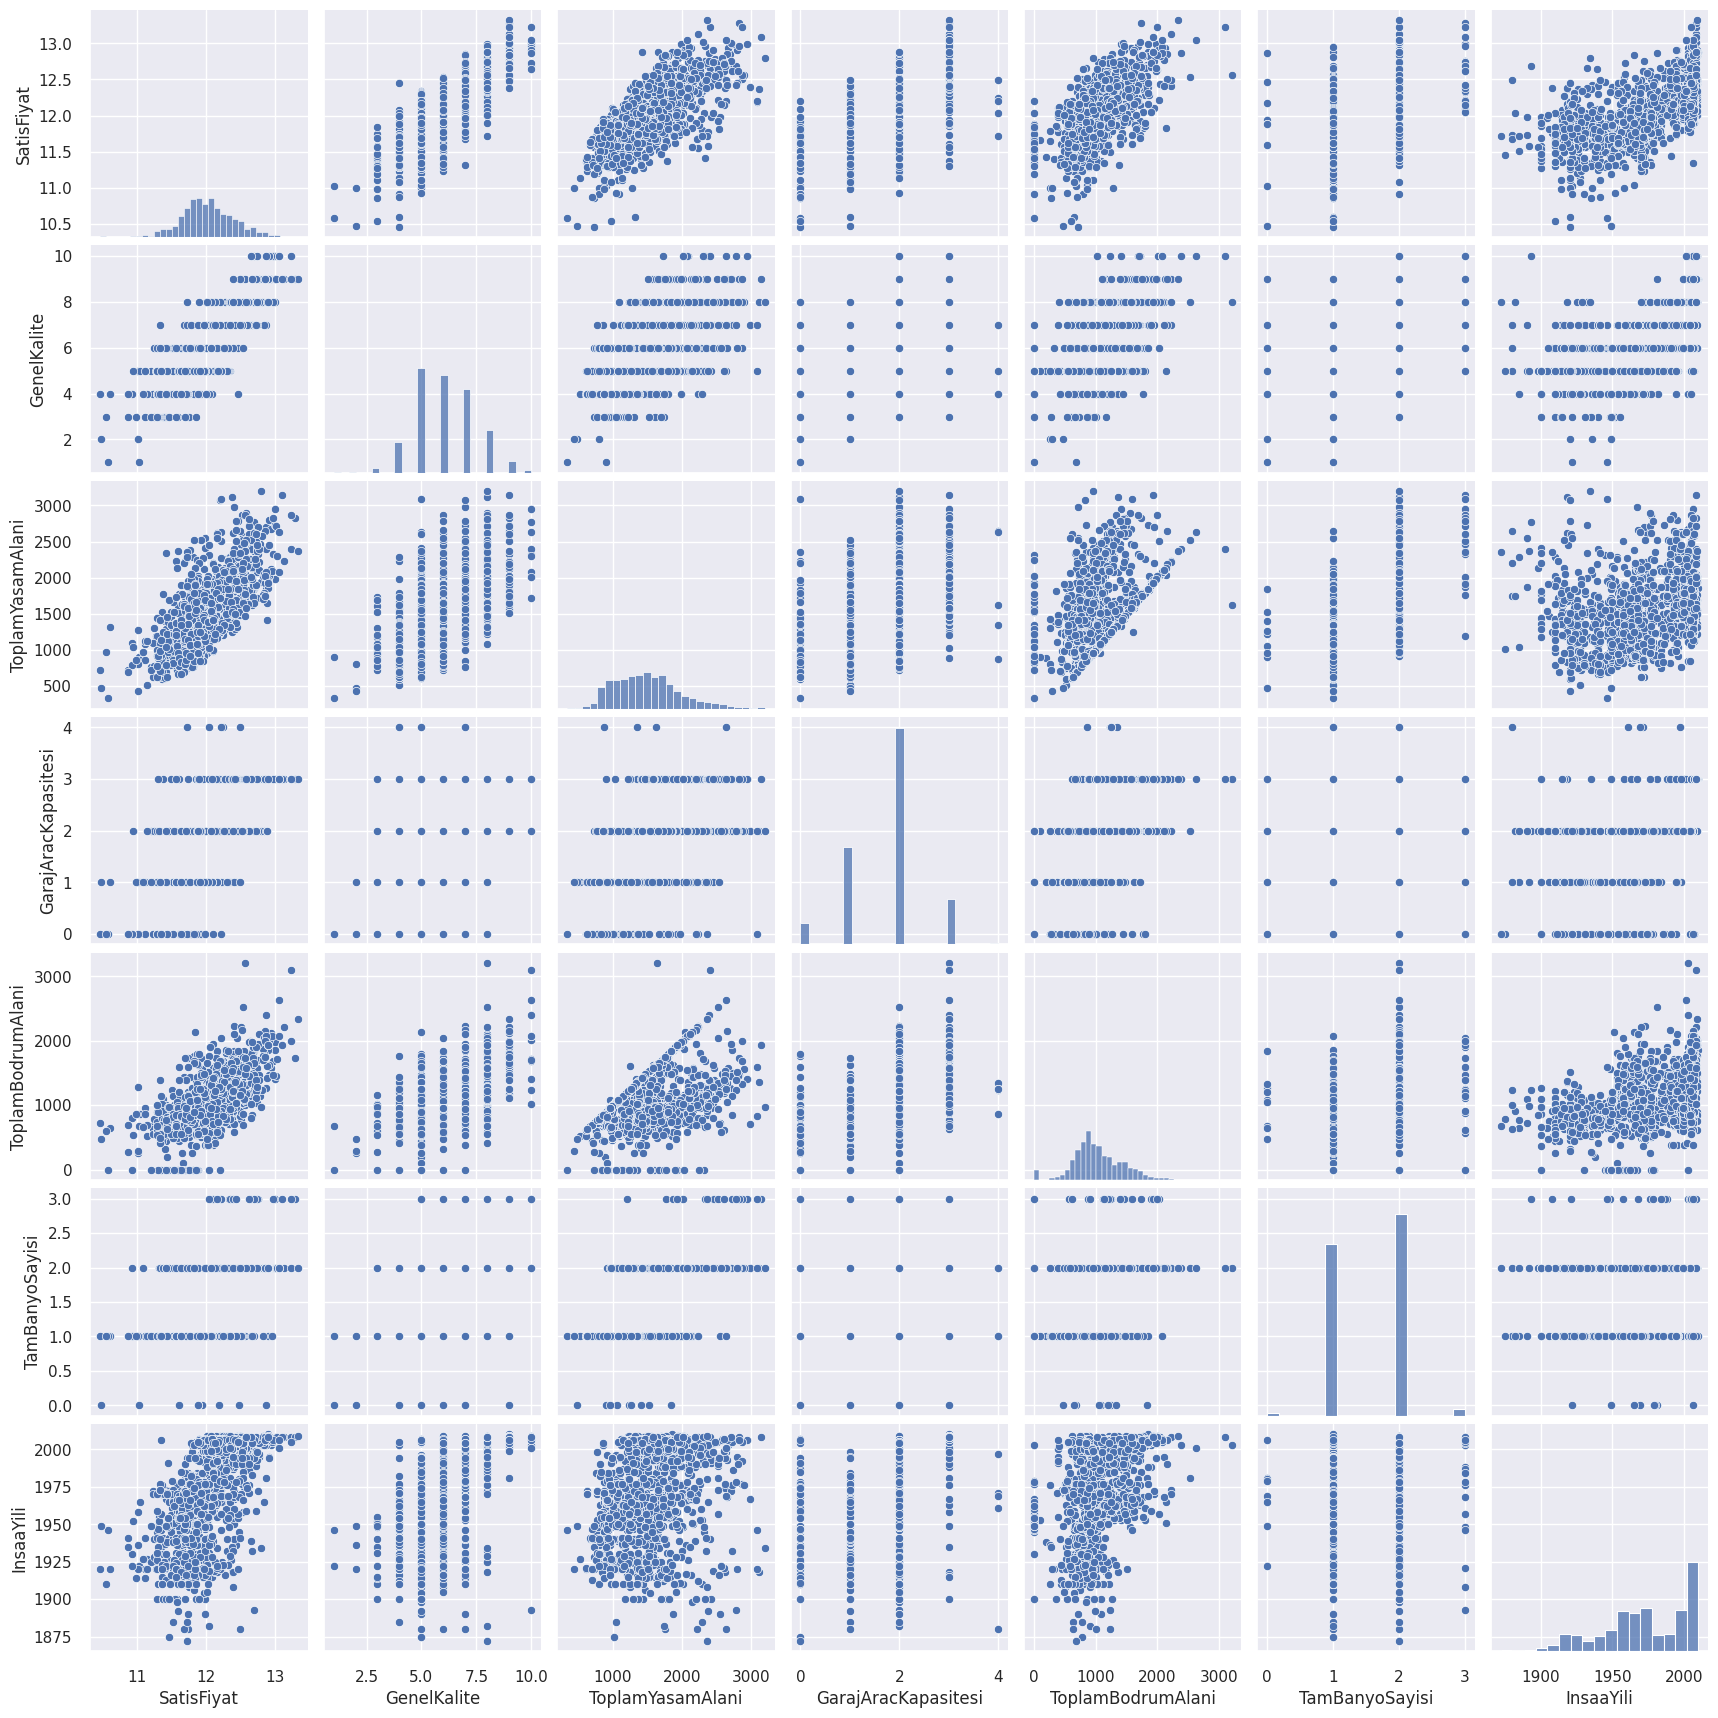

In [ ]:
#histogram and scatter plot
sns.set()
cols = ['SatisFiyat', 'GenelKalite', 'ToplamYasamAlani', 'GarajAracKapasitesi', 'ToplamBodrumAlani', 'TamBanyoSayisi', 'InsaaYili']
sns.pairplot(train[cols], height = 2.5)
plt.show();

SalePrice ve TotalBsmtSF arasındaki korelasonu gösteren işlemler sonrası nihai lmplot Grafiği



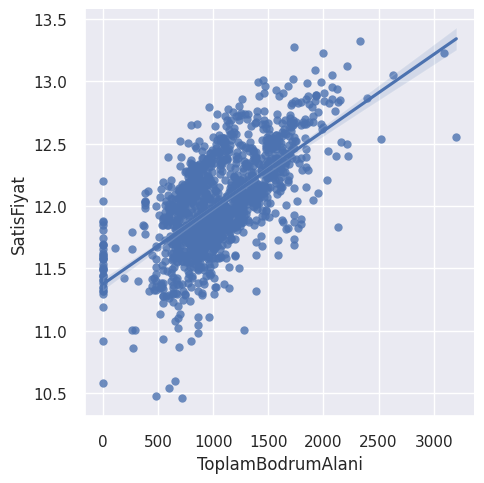

In [ ]:
sns.lmplot(x='ToplamBodrumAlani',y='SatisFiyat',data=train)


SalePrice ve 1stFlrSF arasındaki korelasonu gösteren işlemler sonrası nihai lmplot Grafiği


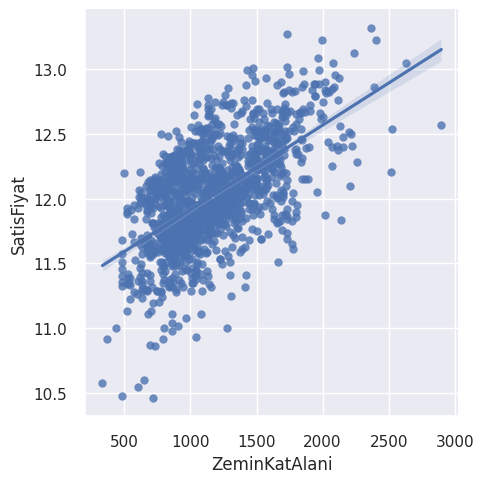

In [ ]:
sns.lmplot(x='ZeminKatAlani',y='SatisFiyat',data=train)


Özellik Mühendisliği


In [ ]:
corr = train.corr()


In [ ]:
corr[corr['SatisFiyat']>0.3].index


Index(['ArsaCephesi', 'GenelKalite', 'InsaaYili', 'YenilemeYili',
       'DuvarKaplamaAlani', 'BodrumBitirmeAlani1', 'ToplamBodrumAlani',
       'ZeminKatAlani', 'ToplamYasamAlani', 'TamBanyoSayisi',
       'YarimBanyoSayisi', 'ToplamOdaSayisi', 'SomineSayisi', 'GarajInsaaYili',
       'GarajAracKapasitesi', 'GarajAlani', 'AhsapTerasAlani',
       'AcikTerasAlani', 'SatisFiyat'],
      dtype='object')

In [ ]:
train = train[['ArsaCephesi', 'GenelKalite', 'InsaaYili', 'YenilemeYili',
       'DuvarKaplamaAlani', 'BodrumBitirmeAlani1', 'ToplamBodrumAlani',
       'ZeminKatAlani', 'ToplamYasamAlani', 'TamBanyoSayisi',
       'YarimBanyoSayisi', 'ToplamOdaSayisi', 'SomineSayisi', 'GarajInsaaYili',
       'GarajAracKapasitesi', 'GarajAlani', 'AhsapTerasAlani',
       'AcikTerasAlani', 'SatisFiyat']]
test=test[['ArsaCephesi', 'GenelKalite', 'InsaaYili', 'YenilemeYili',
       'DuvarKaplamaAlani', 'BodrumBitirmeAlani1', 'ToplamBodrumAlani',
       'ZeminKatAlani', 'ToplamYasamAlani', 'TamBanyoSayisi',
       'YarimBanyoSayisi', 'ToplamOdaSayisi', 'SomineSayisi', 'GarajInsaaYili',
       'GarajAracKapasitesi', 'GarajAlani', 'AhsapTerasAlani',
       'AcikTerasAlani']]

Kayıp Veri Analizi

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Toplam', 'Yüzde'])
missing_data.head(25)

,Toplam,Yüzde
ArsaCephesi,257,0.177609
GarajInsaaYili,80,0.055287
DuvarKaplamaAlani,8,0.005529
YarimBanyoSayisi,0,0.000000
AcikTerasAlani,0,0.000000
AhsapTerasAlani,0,0.000000
GarajAlani,0,0.000000
GarajAracKapasitesi,0,0.000000
SomineSayisi,0,0.000000
ToplamOdaSayisi,0,0.000000


In [ ]:
#Eksik verilerin fazla olduğu değişkenlerin model dışına alınması işlemi
train = train.drop((missing_data[missing_data['Toplam'] > 81]).index,1)

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(20)


GarajInsaaYili         80
DuvarKaplamaAlani       8
GenelKalite             0
ToplamOdaSayisi         0
AcikTerasAlani          0
AhsapTerasAlani         0
GarajAlani              0
GarajAracKapasitesi     0
SomineSayisi            0
YarimBanyoSayisi        0
InsaaYili               0
TamBanyoSayisi          0
ToplamYasamAlani        0
ZeminKatAlani           0
ToplamBodrumAlani       0
BodrumBitirmeAlani1     0
YenilemeYili            0
SatisFiyat              0
dtype: int64

In [ ]:
#Test veri seti eksik veri analizi
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Toplam', 'Yüzde'])
missing_data.head(25)

,Toplam,Yüzde
ArsaCephesi,227,0.155586
GarajInsaaYili,78,0.053461
DuvarKaplamaAlani,15,0.010281
GarajAlani,1,0.000685
BodrumBitirmeAlani1,1,0.000685
ToplamBodrumAlani,1,0.000685
GarajAracKapasitesi,1,0.000685
ToplamOdaSayisi,0,0.000000
AhsapTerasAlani,0,0.000000
SomineSayisi,0,0.000000


In [ ]:
#Eksik verilerin fazla olduğu değişkenlerin model dışına alınması işlemi
test = test.drop((missing_data[missing_data['Toplam'] > 78]).index,1)

In [ ]:
test.isnull().sum().sort_values(ascending=False).head(20)


GarajInsaaYili         78
DuvarKaplamaAlani      15
BodrumBitirmeAlani1     1
ToplamBodrumAlani       1
GarajAlani              1
GarajAracKapasitesi     1
GenelKalite             0
ToplamOdaSayisi         0
AhsapTerasAlani         0
SomineSayisi            0
TamBanyoSayisi          0
YarimBanyoSayisi        0
InsaaYili               0
ToplamYasamAlani        0
ZeminKatAlani           0
YenilemeYili            0
AcikTerasAlani          0
dtype: int64

Eksik Verilerin İşlenmesi
Kategorik Verilerin Dönüştürülmesi İşlemi

In [ ]:
categorical_feature_mask = train.dtypes==object
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [ ]:
categorical_cols

[]

In [ ]:
categorical_feature_mask_test = test.dtypes==object
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [ ]:
train.head()

,GenelKalite,InsaaYili,YenilemeYili,DuvarKaplamaAlani,BodrumBitirmeAlani1,ToplamBodrumAlani,ZeminKatAlani,ToplamYasamAlani,TamBanyoSayisi,YarimBanyoSayisi,ToplamOdaSayisi,SomineSayisi,GarajInsaaYili,GarajAracKapasitesi,GarajAlani,AhsapTerasAlani,AcikTerasAlani,SatisFiyat
0,7,2003,2003,196.0,706,856,856,1710,2,1,8,0,2003.0,2,548,0,61,12.247699
1,6,1976,1976,0.0,978,1262,1262,1262,2,0,6,1,1976.0,2,460,298,0,12.109016
2,7,2001,2002,162.0,486,920,920,1786,2,1,6,1,2001.0,2,608,0,42,12.317171
3,7,1915,1970,0.0,216,756,961,1717,1,0,7,1,1998.0,3,642,0,35,11.849405
4,8,2000,2000,350.0,655,1145,1145,2198,2,1,9,1,2000.0,3,836,192,84,12.429220


In [ ]:
test.head()

,GenelKalite,InsaaYili,YenilemeYili,DuvarKaplamaAlani,BodrumBitirmeAlani1,ToplamBodrumAlani,ZeminKatAlani,ToplamYasamAlani,TamBanyoSayisi,YarimBanyoSayisi,ToplamOdaSayisi,SomineSayisi,GarajInsaaYili,GarajAracKapasitesi,GarajAlani,AhsapTerasAlani,AcikTerasAlani
0,5,1961,1961,0.0,468.0,882.0,896,896,1,0,5,0,1961.0,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,1,6,0,1958.0,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,1629,2,1,6,1,1997.0,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,1604,2,1,7,1,1998.0,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,1280,2,0,5,0,1992.0,2.0,506.0,0,82


In [ ]:
train['GarajInsaaYili'] = train['GarajInsaaYili'].fillna(train['GarajInsaaYili'].mean())
train['DuvarKaplamaAlani'] = train['DuvarKaplamaAlani'].fillna(train['DuvarKaplamaAlani'].mean())

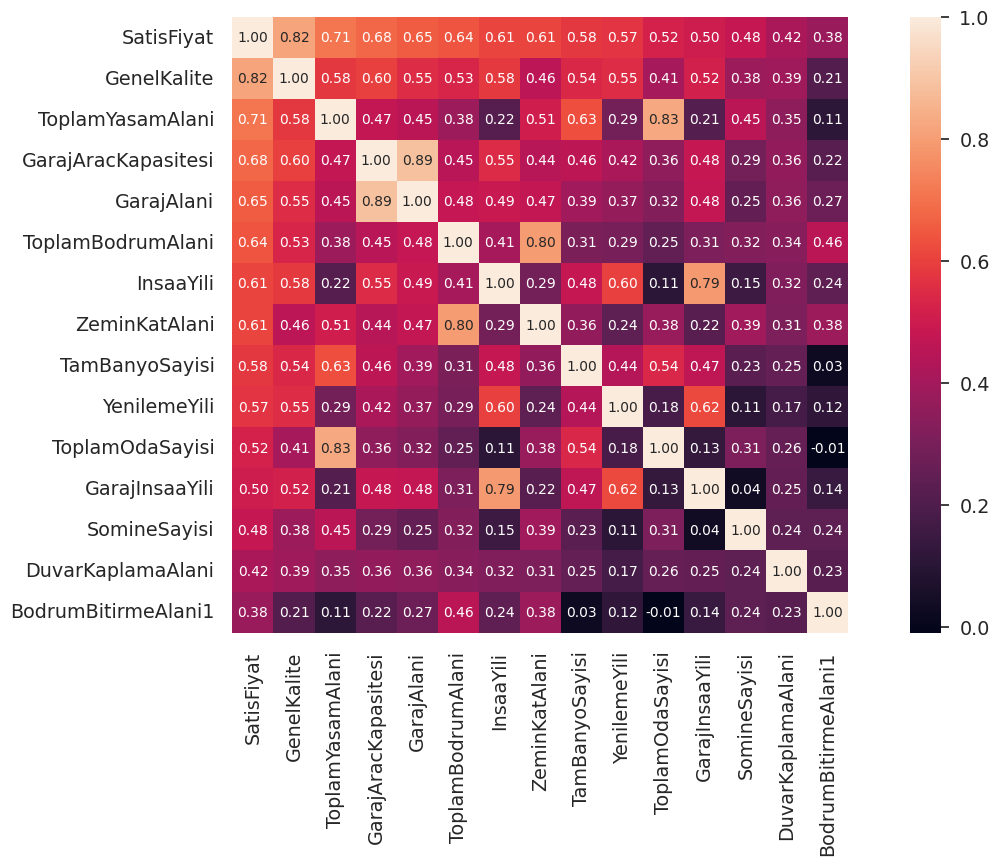

In [ ]:
k = 15
plt.figure(figsize=(16,8))
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SatisFiyat')['SatisFiyat'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
train = train[cols]

In [ ]:
cols

Index(['SatisFiyat', 'GenelKalite', 'ToplamYasamAlani', 'GarajAracKapasitesi',
       'GarajAlani', 'ToplamBodrumAlani', 'InsaaYili', 'ZeminKatAlani',
       'TamBanyoSayisi', 'YenilemeYili', 'ToplamOdaSayisi', 'GarajInsaaYili',
       'SomineSayisi', 'DuvarKaplamaAlani', 'BodrumBitirmeAlani1'],
      dtype='object')

In [ ]:
test=test[cols.drop('SatisFiyat')]

In [ ]:
test.head()


,GenelKalite,ToplamYasamAlani,GarajAracKapasitesi,GarajAlani,ToplamBodrumAlani,InsaaYili,ZeminKatAlani,TamBanyoSayisi,YenilemeYili,ToplamOdaSayisi,GarajInsaaYili,SomineSayisi,DuvarKaplamaAlani,BodrumBitirmeAlani1
0,5,896,1.0,730.0,882.0,1961,896,1,1961,5,1961.0,0,0.0,468.0
1,6,1329,1.0,312.0,1329.0,1958,1329,1,1958,6,1958.0,0,108.0,923.0
2,5,1629,2.0,482.0,928.0,1997,928,2,1998,6,1997.0,1,0.0,791.0
3,6,1604,2.0,470.0,926.0,1998,926,2,1998,7,1998.0,1,20.0,602.0
4,8,1280,2.0,506.0,1280.0,1992,1280,2,1992,5,1992.0,0,0.0,263.0


In [ ]:
test['GarajInsaaYili'] = test['GarajInsaaYili'].fillna(test['GarajInsaaYili'].mean())
test['DuvarKaplamaAlani'] = test['DuvarKaplamaAlani'].fillna(test['DuvarKaplamaAlani'].mean())
test['GarajAracKapasitesi'] = test['GarajAracKapasitesi'].fillna(test['GarajAracKapasitesi'].mean())
test['GarajAlani'] = test['GarajAlani'].fillna(test['GarajAlani'].mean())
test['BodrumBitirmeAlani1'] = test['BodrumBitirmeAlani1'].fillna(test['BodrumBitirmeAlani1'].mean())
test['ToplamBodrumAlani'] = test['ToplamBodrumAlani'].fillna(test['ToplamBodrumAlani'].mean())

Verilerin eğitim ve test verileri olmak üzere ikiye ayrılma işlemi (%70 eğitim, % 30 test)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('SatisFiyat', axis=1), train['SatisFiyat'], test_size=0.3, random_state=101)


In [ ]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [ ]:
X_train

array([[ 2.17200106,  2.52455343,  1.6574518 , ...,  2.11409158,
         4.62921664,  2.25743588],
       [-0.06483585, -0.51008551,  0.31557882, ..., -0.96648535,
         0.25272366,  0.50193923],
       [-0.06483585, -0.30984063, -2.36816714, ..., -0.96648535,
        -0.61534107, -1.02538942],
       ...,
       [ 0.68077645, -0.02289177,  0.31557882, ...,  0.57380311,
        -0.01854657,  1.12125237],
       [ 0.68077645,  0.93498065,  1.6574518 , ...,  0.57380311,
        -0.61534107, -1.02538942],
       [-0.06483585,  0.36521171,  0.31557882, ..., -0.96648535,
         0.0839333 ,  0.15037425]])

Lineer Regresyon

In [ ]:
lm = LinearRegression()

Modeli Oluşturma ve Eğitme

In [ ]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression()


In [ ]:
print(lm.intercept_)

[1.23770364e-16]


Modelin Değerlendirilmesi


In [ ]:
print(lm.coef_)

[[ 0.3006152   0.3294042   0.06134552  0.08743354  0.14207659  0.1535908
  -0.01485055 -0.0145934   0.12445747 -0.00195905 -0.05027141  0.08781189
  -0.00868621  0.12931827]]


Model Üzerinden Tahminleme İşlemi


In [ ]:
lineer_predictions = lm.predict(X_test)
lineer_predictions= lineer_predictions.reshape(-1,1)

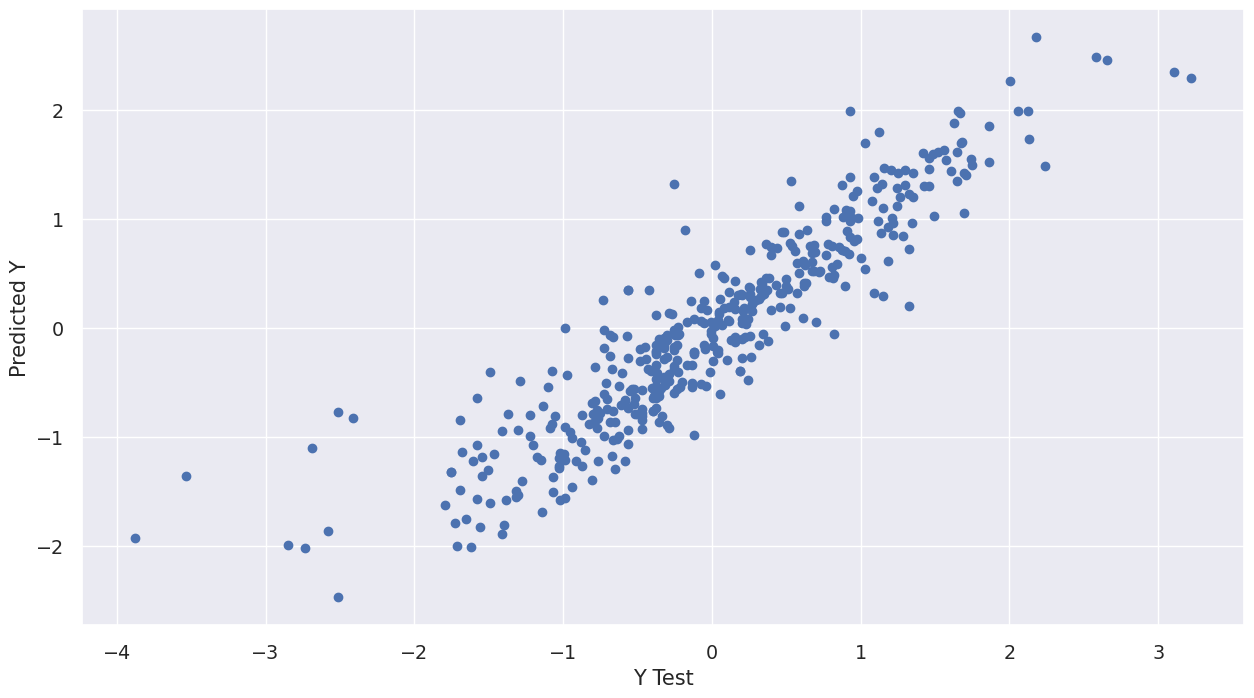

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lineer_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

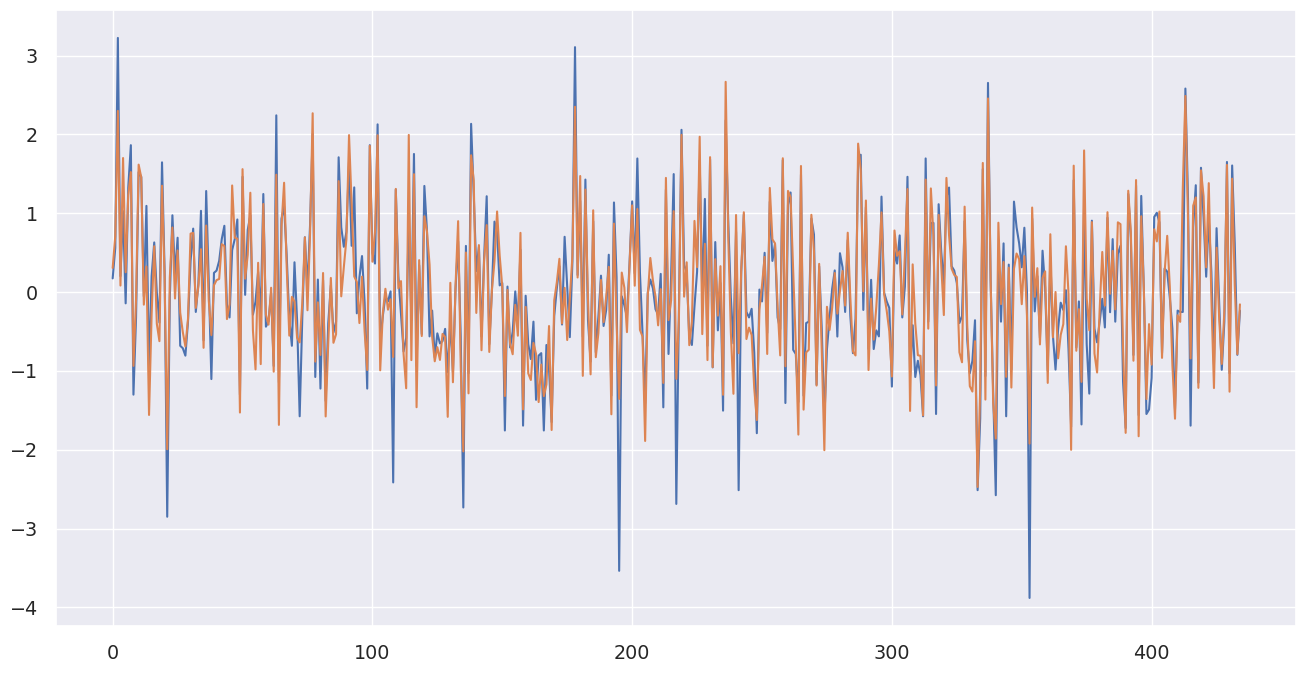

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(lineer_predictions, label = 'predict')
plt.show()

Regresyon Değerlendirme Metrikleri
Metrik Analizi

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lineer_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lineer_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lineer_predictions)))
lm_RMSE=np.sqrt(metrics.mean_squared_error(y_test, lineer_predictions))

MAE: 0.2888932618000341
MSE: 0.16370514984121912
RMSE: 0.4046049305695855


In [ ]:
lm_R2score=r2_score(y_test, lineer_predictions)
lm_R2score

0.8362948501587809

Decision Tree Regresyon-Karar Ağacı Regresyon Uygulaması


In [ ]:
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [ ]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
dtr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, dtr_pred))

MAE: 0.41226958515017914
MSE: 0.33567640229913415
RMSE: 0.5793758730730286


In [ ]:
dtr_R2score=r2_score(y_test, dtr_pred)
dtr_R2score

0.6643235977008659

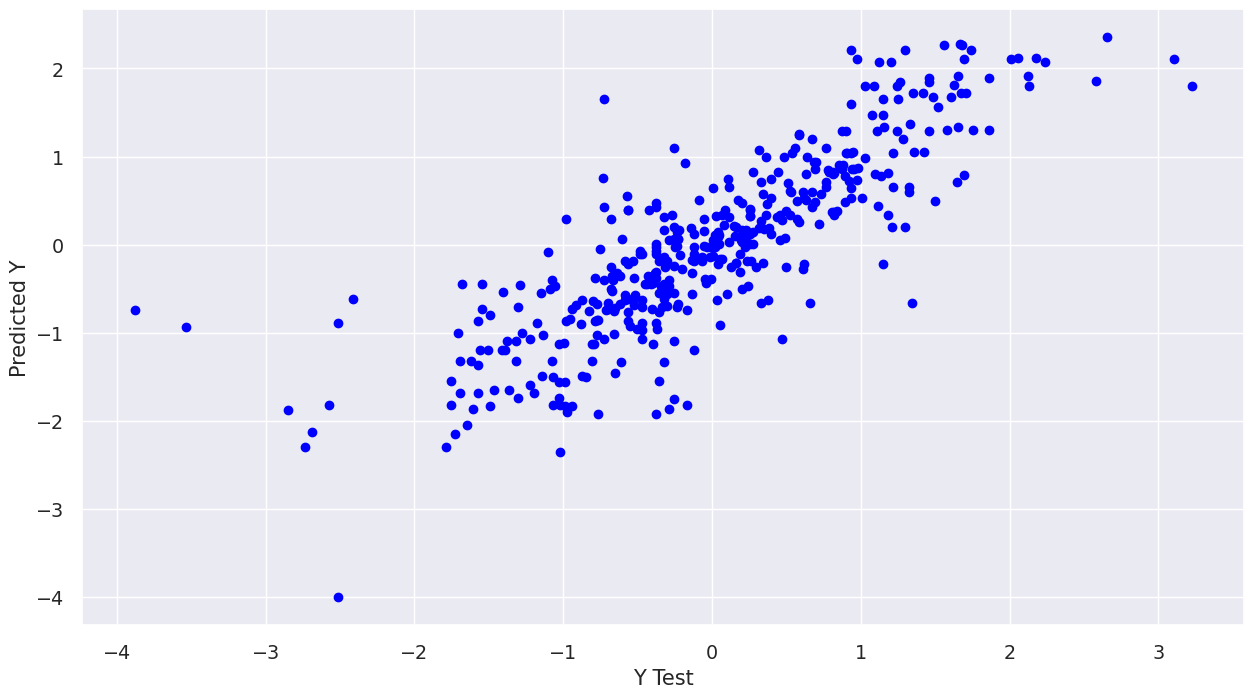

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Linear Support Vector Machine Regresyon (Linear SVR)


In [ ]:
lsvr = LinearSVR(verbose=0, dual=True)
lsvr.fit(X_train, y_train)

LinearSVR()

In [ ]:
lsvr_pred = lsvr.predict(X_test)
lsvr_pred= lsvr_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lsvr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lsvr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lsvr_pred)))
lsvr_RMSE=np.sqrt(metrics.mean_squared_error(y_test, lsvr_pred))

MAE: 0.2808457173788493
MSE: 0.16587370428281484
RMSE: 0.40727595593505744


In [ ]:
lsvr_R2score=r2_score(y_test, lsvr_pred)
lsvr_R2score

0.8341262957171851

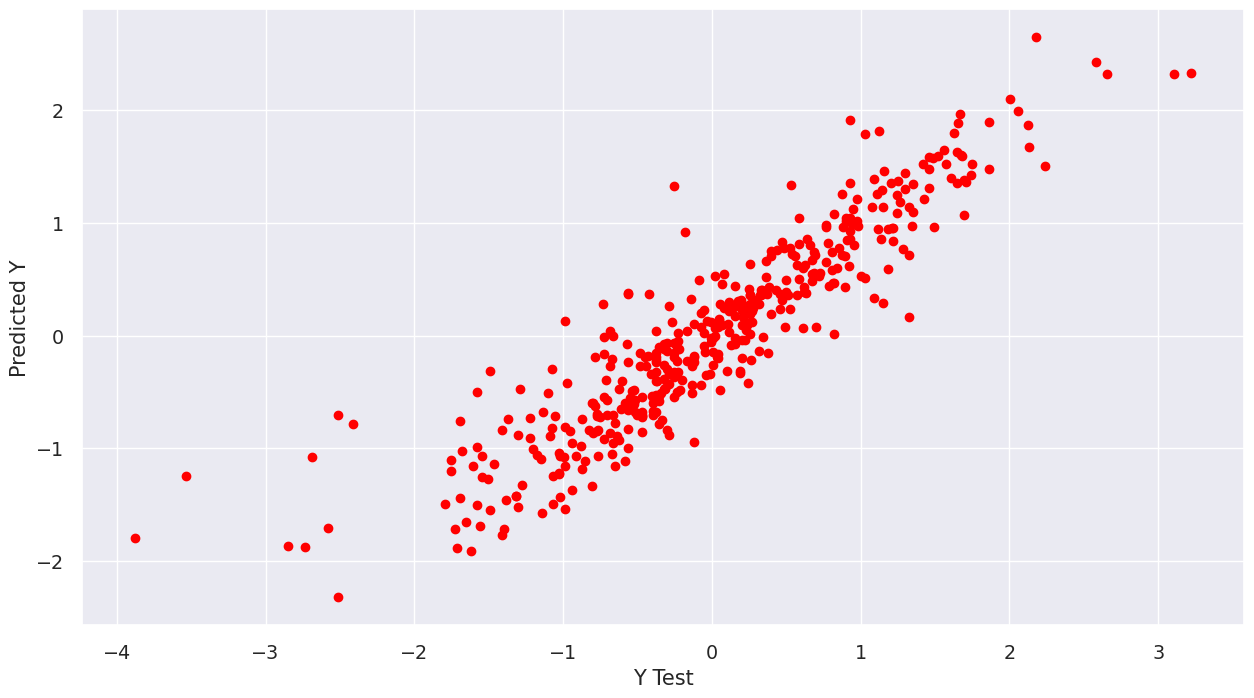

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lsvr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
ridgereg = Ridge(alpha=0.05)
ridgereg.fit(X_train_scaled, y_train)


Ridge(alpha=0.05)

In [ ]:
ridge_pred = ridgereg.predict(X_test)
ridge_pred= ridge_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
ridge_RMSE=np.sqrt(metrics.mean_squared_error(y_test, ridge_pred))

MAE: 0.2888892620085837
MSE: 0.16370217084490368
RMSE: 0.40460124918851115


In [ ]:
ridge_R2score=r2_score(y_test, ridge_pred)
ridge_R2score

0.8362978291550963

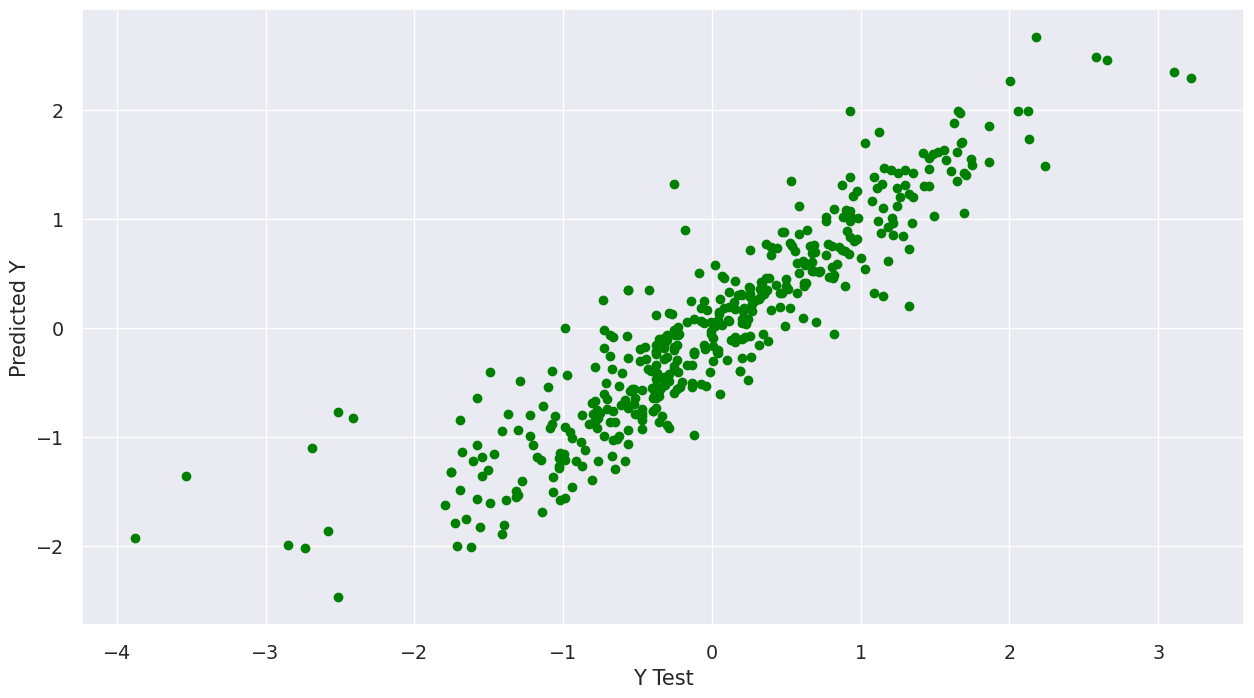

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,ridge_pred, c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Lasso Regresyon

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=10, max_iter=100000)

In [ ]:
lasso_pred = lassocv.predict(X_test)
lasso_pred= lasso_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
lasso_RMSE=np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))

MAE: 0.2882792353181634
MSE: 0.1639669264842852
RMSE: 0.40492829795444674


In [ ]:
lasso_R2score=r2_score(y_test, lasso_pred)
lasso_R2score

0.8360330735157148

Model Karşılaştırma RMSE Değerlerini Model Bazlı Karşılaştırma İşlemi

> Blok alıntı ekle



In [ ]:
Label_list = ['Lineer Regression  RMSE','Decsion Tree Regression RMSE','Linear SVR RMSE','Ridge Regression RMSE','Lasso Regression RMSE']
Data_List = [0.4046049305695855,0.57385849944418, 0.40778688122403417,0.4034581926650388,0.4049282979544468]
Model_karsilastirma_RMSE= pd.Series(Data_List,Label_list)
Model_karsilastirma_RMSE

Lineer Regression  RMSE         0.404605
Decsion Tree Regression RMSE    0.573858
Linear SVR RMSE                 0.407787
Ridge Regression RMSE           0.403458
Lasso Regression RMSE           0.404928
dtype: float64

R Square Değerlerini Model Bazlı Karşılaştırma İşlemi


In [ ]:
print('Lineer R2 Score Değeri: ',lm_R2score)
print('Decision Tree R2 Score Değeri: ',dtr_R2score)
print('Linear SVR R2 Score Değeri: ',lsvr_R2score)
print('Ridge R2 Score Değeri: ',ridge_R2score)
print('Lasso R2 Score Değeri: ',lasso_R2score)

Lineer R2 Score Değeri:  0.8362948501587809
Decision Tree R2 Score Değeri:  0.6643235977008659
Linear SVR R2 Score Değeri:  0.8341262957171851
Ridge R2 Score Değeri:  0.8362978291550963
Lasso R2 Score Değeri:  0.8360330735157148


Test Veri Seti Kullanılarak Modellerin Tahmin Değerlerinin Uygulanması ve Veri Setlerinin Oluşturulması Aşaması

In [ ]:
a = pd.DataFrame(test_ids, columns=['Id'])

In [ ]:
test = sc_X.fit_transform(test)

In [ ]:
test.shape

(1459, 14)

Lineer Regresyon Veri Seti Model Çıktı Uygulaması


In [ ]:
test_prediction_lineer=lm.predict(test)
test_prediction_lineer= test_prediction_lineer.reshape(-1,1)

In [ ]:
test_prediction_lineer

array([[-0.82819822],
       [-0.27047566],
       [ 0.19145171],
       ...,
       [ 0.06006234],
       [-0.87634856],
       [ 0.97407244]])

In [ ]:
test_prediction_lineer =sc_y.inverse_transform(test_prediction_lineer)


In [ ]:
test_prediction_lineer= pd.DataFrame(test_prediction_lineer, columns=['SatisFiyat'])


In [ ]:
test_prediction_lineer = pd.DataFrame(np.expm1(test_prediction_lineer))


In [ ]:
test_prediction_lineer.head()


,SatisFiyat
0,117009.443616
1,145960.133286
2,175289.577496
3,184853.683335
4,187157.611445


In [ ]:
sonuc = pd.concat([a,test_prediction_lineer], axis=1)


In [ ]:
sonuc.head()

,Id,SatisFiyat
0,1461,117009.443616
1,1462,145960.133286
2,1463,175289.577496
3,1464,184853.683335
4,1465,187157.611445


In [ ]:
sonuc.to_csv('veriseti_ln.csv',index=False)


Decision Tree Regresyon(Karar Ağacı Regresyon) Veri Seti Model Çıktı Uygulaması


In [ ]:
test_prediction_dtr=dtreg.predict(test)
test_prediction_dtr= test_prediction_dtr.reshape(-1,1)

In [ ]:
test_prediction_dtr

array([[-0.90333836],
       [ 0.15301459],
       [ 0.12371553],
       ...,
       [-0.2226724 ],
       [-1.75336241],
       [ 1.02261807]])

In [ ]:
test_prediction_dtr =sc_y.inverse_transform(test_prediction_dtr)


In [ ]:
test_prediction_dtr= pd.DataFrame(test_prediction_dtr, columns=['SatisFiyat'])


In [ ]:
test_prediction_dtr = pd.DataFrame(np.expm1(test_prediction_dtr))


In [ ]:
test_prediction_dtr.head()

,SatisFiyat
0,113575.677871
1,172639.059112
2,170645.627397
3,168652.697307
4,222623.533275


In [ ]:
sonuc2 = pd.concat([a,test_prediction_dtr], axis=1)


In [ ]:
sonuc2.head()

,Id,SatisFiyat
0,1461,113575.677871
1,1462,172639.059112
2,1463,170645.627397
3,1464,168652.697307
4,1465,222623.533275


In [ ]:
sonuc2.to_csv('veriseti_dtr.csv',index=False)

Ridge Regresyon Veri Seti Model Çıktı Uygulaması

In [ ]:
test_prediction_ridge=ridgereg.predict(test)
test_prediction_ridge= test_prediction_ridge.reshape(-1,1)

In [ ]:
test_prediction_ridge

array([[-0.82820731],
       [-0.27050728],
       [ 0.19142829],
       ...,
       [ 0.06009228],
       [-0.87635569],
       [ 0.9740767 ]])

In [ ]:
test_prediction_ridge =sc_y.inverse_transform(test_prediction_ridge)


In [ ]:
test_prediction_ridge= pd.DataFrame(test_prediction_ridge, columns=['SatisFiyat'])


In [ ]:
test_prediction_ridge= pd.DataFrame(np.expm1(test_prediction_ridge))


In [ ]:
test_prediction_ridge.head()

,SatisFiyat
0,117009.021731
1,145958.304202
2,175287.950139
3,184853.798989
4,187155.775224


In [ ]:
sonuc3 = pd.concat([a,test_prediction_ridge], axis=1)


In [ ]:
sonuc3.head()


,Id,SatisFiyat
0,1461,117009.021731
1,1462,145958.304202
2,1463,175287.950139
3,1464,184853.798989
4,1465,187155.775224


In [ ]:
sonuc3.to_csv('veriseti_ridge.csv',index=False)

Linear Support Vector Machine Regresyon (Linear SVR) Veri Seti Model Çıktı Uygulaması


In [ ]:
test_prediction_lsvr=lsvr.predict(test)
test_prediction_lsvr= test_prediction_lsvr.reshape(-1,1)

In [ ]:
test_prediction_lsvr

array([[-0.74507622],
       [-0.22126897],
       [ 0.22239911],
       ...,
       [ 0.09145002],
       [-0.81803793],
       [ 0.97800083]])

In [ ]:
test_prediction_lsvr =sc_y.inverse_transform(test_prediction_lsvr)


In [ ]:
test_prediction_lsvr= pd.DataFrame(test_prediction_lsvr, columns=['SatisFiyat'])


In [ ]:
test_prediction_lsvr= pd.DataFrame(np.expm1(test_prediction_lsvr))


In [ ]:
test_prediction_lsvr.head()

,SatisFiyat
0,120929.034379
1,148835.077678
2,177453.167951
3,185870.904375
4,184325.761915


In [ ]:
sonuc4 = pd.concat([a,test_prediction_lsvr], axis=1)

In [ ]:

sonuc4.head()

,Id,SatisFiyat
0,1461,120929.034379
1,1462,148835.077678
2,1463,177453.167951
3,1464,185870.904375
4,1465,184325.761915


In [ ]:
sonuc4.to_csv('veriseti_lsvr.csv',index=False)


Lasso Regresyon Veri Seti Model Çıktı Uygulaması


In [ ]:
test_prediction_lasso=lassocv.predict(test)
test_prediction_lasso= test_prediction_lasso.reshape(-1,1)

In [ ]:
test_prediction_lasso =sc_y.inverse_transform(test_prediction_lasso)


In [ ]:
test_prediction_lasso= pd.DataFrame(test_prediction_lasso, columns=['SatisFiyat'])


In [ ]:
test_prediction_lasso= pd.DataFrame(np.expm1(test_prediction_lasso))


In [ ]:
test_prediction_lasso.head()


,SatisFiyat
0,116318.457729
1,145652.064256
2,174406.662644
3,184263.647315
4,187653.715108


In [ ]:
sonuc5 = pd.concat([a,test_prediction_lasso], axis=1)


In [ ]:
sonuc5.head()


,Id,SatisFiyat
0,1461,116318.457729
1,1462,145652.064256
2,1463,174406.662644
3,1464,184263.647315
4,1465,187653.715108


In [ ]:
sonuc5.to_csv('veriseti_lasso.csv',index=False)
